<a href="https://colab.research.google.com/github/QuangDuyxyz/AI/blob/main/Nhandiencamxuc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from os import listdir
from numpy import asarray, save
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten
import numpy as np


In [ ]:
folder = '/content/drive/MyDrive/ColabNotebooks/okkkkkk/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('Anger'):
    output = 0
    photo = load_img(folder+file,target_size=(48,48))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Disgust'):
    output = 1
    photo = load_img(folder+file,target_size=(48,48))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Fear'):
    output = 2
    photo = load_img(folder+file,target_size=(48,48))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Happiness'):
    output = 3
    photo = load_img(folder+file,target_size=(48,48))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Neutral'):
    output = 4
    photo = load_img(folder+file,target_size=(48,48))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Sadness'):
    output = 5
    photo = load_img(folder+file,target_size=(48,48))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Surprise'):
    output = 6
    photo = load_img(folder+file,target_size=(48,48))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('nhandienemotion.npy', photos)
save('nhandienemotion.npy', labels)


(128, 48, 48, 3) (128,)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
print(labels.shape)
labels
photos.shape


(128,)


(128, 48, 48, 3)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(48, 48, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
mhistory = model.fit(photos, labels, epochs=11, verbose=1)


Epoch 1/11
4/4 [==============================] - 3s 9ms/step - loss: 240.5353 - accuracy: 0.1094
Epoch 2/11
4/4 [==============================] - 0s 8ms/step - loss: 114.8704 - accuracy: 0.1406
Epoch 3/11
4/4 [==============================] - 0s 8ms/step - loss: 48.3846 - accuracy: 0.0938
Epoch 4/11
4/4 [==============================] - 0s 8ms/step - loss: 18.3550 - accuracy: 0.2578
Epoch 5/11
4/4 [==============================] - 0s 7ms/step - loss: 8.7168 - accuracy: 0.3828
Epoch 6/11
4/4 [==============================] - 0s 8ms/step - loss: 5.2421 - accuracy: 0.3672
Epoch 7/11
4/4 [==============================] - 0s 8ms/step - loss: 3.1114 - accuracy: 0.4531
Epoch 8/11
4/4 [==============================] - 0s 8ms/step - loss: 1.7359 - accuracy: 0.5547
Epoch 9/11
4/4 [==============================] - 0s 7ms/step - loss: 1.0261 - accuracy: 0.6172
Epoch 10/11
4/4 [==============================] - 0s 8ms/step - loss: 0.7955 - accuracy: 0.7500
Epoch 11/11
4/4 [================

In [ ]:
model.evaluate(photos,labels)

4/4 [==============================] - 0s 5ms/step - loss: 0.3839 - accuracy: 0.9297


[0.3838774859905243, 0.9296875]

In [ ]:
model.save('nhandienemotion.h5')

In [ ]:
classes = ["Anger","Disgust","Fear","Happiness","Neutral","Sadness","Surprise"]

1/1 [==============================] - 1s 633ms/step
[[0.10311583 0.10146489 0.10376997 0.10337964 0.10043728 0.10054715
  0.10048696 0.09551996 0.0967904  0.09448789]]


'Fear'

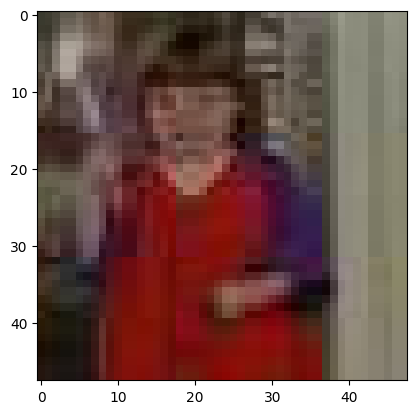

In [ ]:
img = load_img('/content/drive/MyDrive/ColabNotebooks/okkkkkk/Anger (1).jpg', target_size=(48,48))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,48,48,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

1/1 [==============================] - 0s 18ms/step
[[0.10194247 0.1031683  0.10283696 0.10419036 0.10033878 0.1015477
  0.10224663 0.09356448 0.0957329  0.09443141]]


'Happiness'

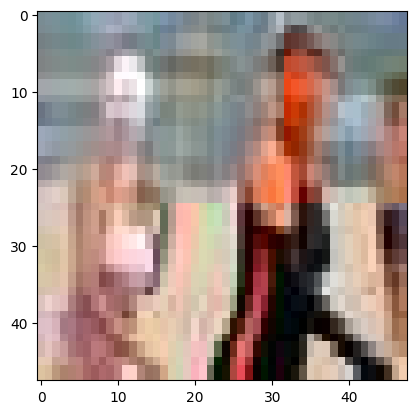

In [ ]:
img = load_img('/content/drive/MyDrive/ColabNotebooks/okkkkkk/Disgust (1).jpg', target_size=(48,48))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,48,48,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

1/1 [==============================] - 0s 18ms/step
[[0.10266134 0.10260326 0.10492304 0.10431156 0.10278316 0.10177002
  0.10114612 0.0920656  0.09633777 0.09139816]]


'Fear'

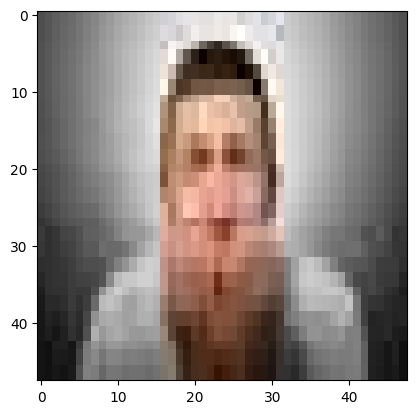

In [ ]:
img = load_img('/content/drive/MyDrive/ColabNotebooks/okkkkkk/Fear (1).jpg', target_size=(48,48))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,48,48,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

1/1 [==============================] - 0s 17ms/step
[[0.1017464  0.1005278  0.10254117 0.10373857 0.10221504 0.10128371
  0.10202681 0.09398977 0.09734426 0.0945865 ]]


'Happiness'

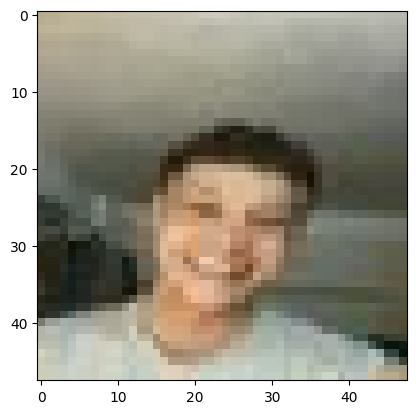

In [ ]:
img = load_img('/content/drive/MyDrive/ColabNotebooks/okkkkkk/Happiness (1).jpg', target_size=(48,48))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,48,48,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

1/1 [==============================] - 0s 18ms/step
[[0.10140798 0.0990658  0.10147183 0.10295162 0.10484615 0.10019284
  0.10386296 0.09617858 0.0970952  0.09292709]]


'Neutral'

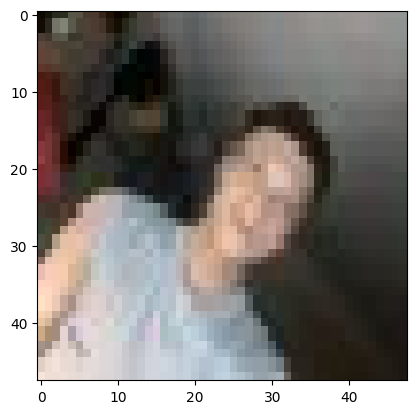

In [ ]:
img = load_img('/content/drive/MyDrive/ColabNotebooks/okkkkkk/Neutral (1).jpg', target_size=(48,48))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,48,48,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

1/1 [==============================] - 0s 29ms/step
[[0.10089716 0.10258484 0.10140615 0.10406148 0.10260516 0.10259413
  0.10300388 0.09274933 0.0975409  0.09255696]]


'Happiness'

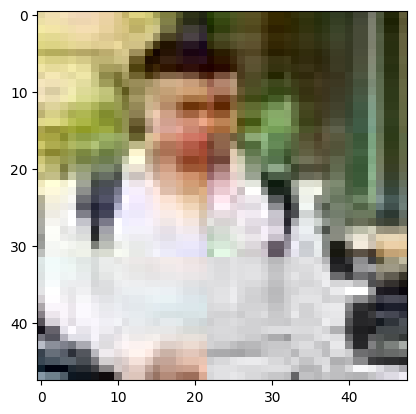

In [ ]:
img = load_img('/content/drive/MyDrive/ColabNotebooks/okkkkkk/Sadness (1).jpg', target_size=(48,48))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,48,48,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

1/1 [==============================] - 0s 20ms/step
[[0.10306587 0.1006321  0.1032571  0.10380186 0.1021013  0.10020316
  0.10332555 0.09508882 0.09561898 0.09290522]]


'Happiness'

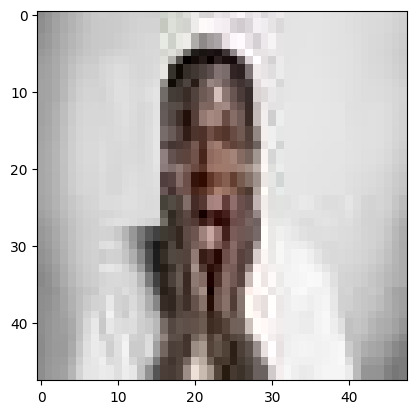

In [ ]:
img = load_img('/content/drive/MyDrive/ColabNotebooks/okkkkkk/Surprise (1).jpg', target_size=(48,48))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,48,48,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

In [ ]:
from keras.models import load_model
models=load_model('nhandienemotion.h5')

In [ ]:
from google.colab import files
# tải file .h5 về máy tính
files.download('nhandienemotion.h5') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>